# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [235]:
%matplotlib inline

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
from __future__ import print_function, division
import scipy.stats as stats
import pylab as pl
import math
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
import seaborn as sns; sns.set(color_codes=True)



In [236]:
# read in readmissions data provided
os.chdir('C:\\LUML\\Springboard\\EDA\\hospital_readmit')
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [237]:
hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95.0,07/01/2010,06/30/2013
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20.0,07/01/2010,06/30/2013


In [238]:
hospital_read_df.dtypes

Hospital Name                  object
Provider Number                 int64
State                          object
Measure Name                   object
Number of Discharges           object
Footnote                      float64
Excess Readmission Ratio      float64
Predicted Readmission Rate    float64
Expected Readmission Rate     float64
Number of Readmissions        float64
Start Date                     object
End Date                       object
dtype: object

In [239]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\local\Anaconda3-4.1.1-Windows-x86_64\lib\site-packages\pandas\core\indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [240]:
len(clean_hospital_read_df)/len(hospital_read_df) # 31% of the data has Number of discharges as "Not Available"

0.6867141162514828

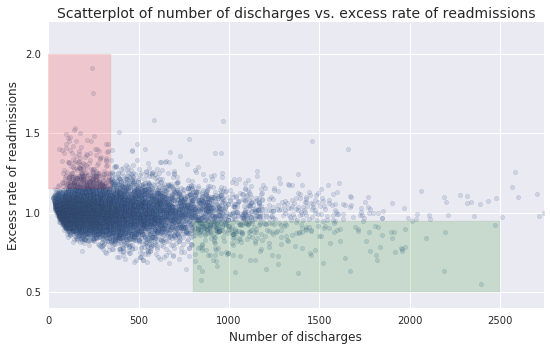

In [241]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

# Do you agree with the above analysis and recommendations? Why or why not?

In [242]:
# B. Statistics
# In hospitals/facilities with number of discharges < 100, 
# mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1
# In hospitals/facilities with number of discharges > 1000, 
# mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1

In [243]:
small = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] < 100]
big = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] > 1000]

In [244]:
print(len(small))
print(len(big))

1269
463


In [245]:
mean_small = small['Excess Readmission Ratio'].dropna().mean()
var_small = small['Excess Readmission Ratio'].dropna().std()
mean_big = big['Excess Readmission Ratio'].dropna().mean()
var_big = big['Excess Readmission Ratio'].dropna().std()
print(mean_small, mean_big)
print(var_small, var_big)

1.0226183501683506 0.9783354211663071
0.05797860323426279 0.12000735348224047


(array([  81.,  482.,  469.,  133.,   11.,    4.,    1.,    1.,    5.,    1.]),
 array([ 0.8935 ,  0.95368,  1.01386,  1.07404,  1.13422,  1.1944 ,
         1.25458,  1.31476,  1.37494,  1.43512,  1.4953 ]),
 <a list of 10 Patch objects>)

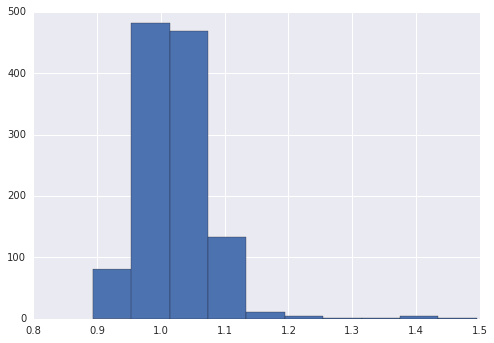

In [246]:
test1 = small['Excess Readmission Ratio'].dropna()
plt.hist(test1)

(array([   5.,    9.,   28.,   76.,  147.,  129.,   54.,   13.,    0.,    2.]),
 array([ 0.5495 ,  0.63998,  0.73046,  0.82094,  0.91142,  1.0019 ,
         1.09238,  1.18286,  1.27334,  1.36382,  1.4543 ]),
 <a list of 10 Patch objects>)

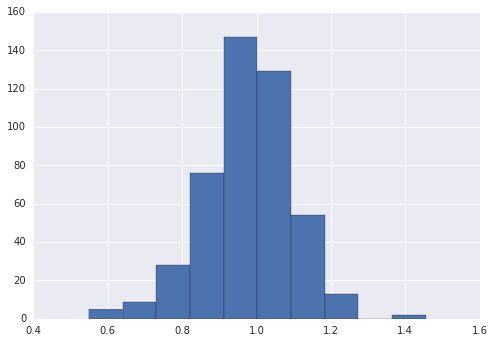

In [247]:
test2 = big['Excess Readmission Ratio'].dropna()
plt.hist(test2)

# Perform t-test between test1 and test2 

In [248]:
# null hypothesis ~ readmission ratio is equal in smaller and larger hospitals
# alternate hypothesis ~ readmission ratio is having significant difference between smaller and larger hospitals
stats.ttest_ind(test1, test2, equal_var=False) # we can see the above the variance is different between test1 and test2

Ttest_indResult(statistic=7.6017424185004856, pvalue=1.2752435451140344e-13)

In [249]:
# the above result says, there is a significant difference between test1 and test2 readmission ratios. 
# so we are rejecting null hypothesis. 
# There is a significant correlation between hospital capacity (number of discharges) and readmission rates.

In [250]:
# compute the t-statistic for alpha = 0.01
def degrees_of_freedom(sample1, sample2):
    s1 = sample1.var()
    s2 = sample2.var()    
    n1 = len(sample1)
    n2 = len(sample2)
    num = (s1  / n1 + s2 / n2)**2
    denom = (s1 / n1)**2 / (n1 - 1) + (s2 / n2)**2 / (n2 - 1)    
    return num / denom
dof = degrees_of_freedom(test1, test2)
stats.t.isf(0.01, dof)

2.3331704517520557

In [251]:
# t-statistic for alpha 0.01 is 2.33 which is much less than the t-statistic we got in the t-test 7.60. 
# So we are 99% confident that there is a significant difference between test1 and test2 readmission ratios.

In [252]:
# https://github.com/natereed/springboard-statsproject3/blob/master/sliderule_dsi_inferential_statistics_exercise_3.ipynb
# Fellow student exercise reference for more inputs. 

In [253]:
# https://www.oswego.edu/~leblanc/data/pracsig.ppt
# Significant differences (i.e., reject the null hypothesis) means that differences in group means are not likely due to sampling error.
# The problem is that statistically significant differences can be found even with very small differences if the sample size is large enough

In [254]:
# Practical (or clinical) significance asks the larger question about differences - 
# "Are the differences between samples big enough to have real meaning"
# Example : Although men and women undoubtedly have different IQs, is that difference large enough 
# to have some practical implication


In [255]:
# that it is almost always necessary to include some index of effect size or strength of relationship in your Results section.… 
# The general principle to be followed … is to provide the reader not only with information about statistical significance 
# but also with enough information to assess the magnitude of the observed effect or relationship

# Find out effect size

In [256]:
def CohenEffectSize(group1, group2):
    """Compute Cohen's d.

    group1: Series or NumPy array
    group2: Series or NumPy array

    returns: float
    """
    diff = group1.mean() - group2.mean()

    n1, n2 = len(group1), len(group2)
    var1 = group1.var()
    var2 = group2.var()

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)
    return d

In [257]:
CohenEffectSize(test1, test2)

0.55106229736287382

1) Cohen proposed a general method for interpreting these type of effect sizes
    d = .2		small effect
    d = .5		medium effect
    d = .8		large effect

2) This is a guideline for interpretation.
3) You need to interpret effect sizes in the context of the research		
4) As Cohens d between test1 and test2 is 0.55 - practical significance ~ medium effect
5) Yes practical and significant significance differ (as you would expect the difference is large from practical standpoint but the effect size ended up as medium effect
6) I would still recommend "Regulatory Policy Recommendations" as the effect size is of medium. But we should convey the practical significance to "business" so they can get a sense of ROI



What are the advantages and disadvantages of using the scatter plot to convey information?
Construct another plot that conveys the same information in a more direct manner.

- Scatter plot (shown above) is not clear from interpretation standpoint. We are getting a higer level picture like majority of the hospitals having number of discharges less than 1000 and readmission rates between 0.75 and 1.25. But we are not able to get clarity on the relationship between discharges and readmission rates. A line plot on top of scatter plot could be of added value

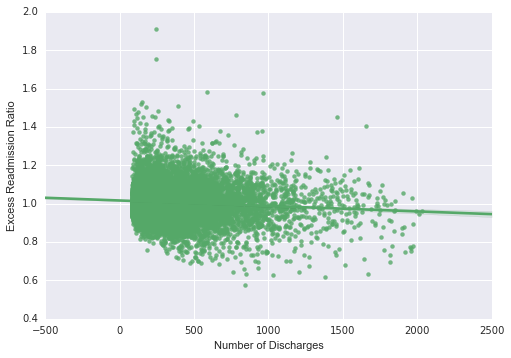

In [269]:
# http://seaborn.pydata.org/generated/seaborn.regplot.html?highlight=regplot#seaborn.regplot
clean_hospital_read_df =  clean_hospital_read_df[81:-3]

ax = sns.regplot(x="Number of Discharges", y="Excess Readmission Ratio", data=clean_hospital_read_df, color="g")


The above plot has correlation line between readmissions rate and number of discharges and you can clearly see there is a slight negative correlation. Another excellent plot is seaborn joint plot (below)

C:\local\Anaconda3-4.1.1-Windows-x86_64\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


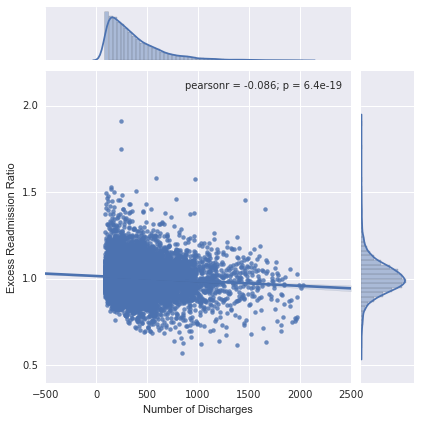

In [271]:
sns.jointplot(x="Number of Discharges", y="Excess Readmission Ratio", data=clean_hospital_read_df, kind="reg")